In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
from sklearn import linear_model
import seaborn as sns

In [ ]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()

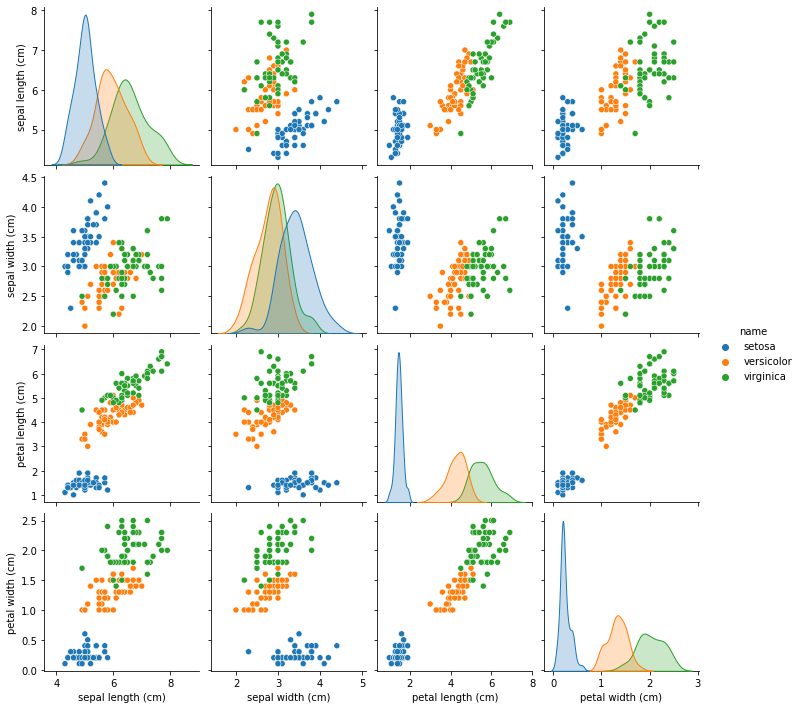

In [ ]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]],
    hue = 'name'
)

In [ ]:
A = iris_frame.iloc[:,:4]
#A
U, s, W = np.linalg.svd(A)
# Транспонируем матрицу W
V = W.T

# s - список диагональных элементов, его нужно привести к виду диагональной матрицы для наглядности
Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица U размер:{U.shape} :\n{U}')
print(f'Матрица Sigma размер:{Sigma.shape} :\n{Sigma}')
print(f'Матрица V размер:{V.shape} :\n{V}')

Матрица U размер:(150, 150) :
[[-0.06161685  0.12961144  0.0021386  ... -0.09343429 -0.09573864
  -0.08085465]
 [-0.05807094  0.11101978  0.07067239 ...  0.03690405 -0.03153954
   0.01309526]
 [-0.05676305  0.11796647  0.00434255 ...  0.03066199  0.19531473
   0.13569909]
 ...
 [-0.0940593  -0.0498297  -0.04144001 ...  0.98181631 -0.02194514
  -0.00894446]
 [-0.09488961 -0.05610123 -0.21297821 ... -0.02155617  0.94178018
  -0.02971961]
 [-0.08847836 -0.0515697  -0.09575285 ... -0.0086052  -0.03021088
   0.9736599 ]]
Матрица Sigma размер:(150, 4) :
[[95.95991387  0.          0.          0.        ]
 [ 0.         17.76103366  0.          0.        ]
 [ 0.          0.          3.46093093  0.        ]
 [ 0.          0.          0.          1.88482631]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.         

In [ ]:
n_elements = 2
Sigma = Sigma[:, :n_elements]

V = V[:,:n_elements]
# reconstruct
B = U.dot(Sigma.dot(V.T))
print(B)

U, s, W = np.linalg.svd(B)
# Транспонируем матрицу W
V = W.T

Sigma = np.zeros_like(A, dtype=float)
Sigma[np.diag_indices(min(A.shape))] = s
print(f'Матрица Sigma размер:{Sigma.shape} :\n{Sigma}')

[[5.0952927  3.50597743 1.40192232 0.20165319]
 [4.74588049 3.19610853 1.46136967 0.25800276]
 [4.68667405 3.21586325 1.30954904 0.19452725]
 [4.61488457 3.08894388 1.46347879 0.27002699]
 [5.07488651 3.50623125 1.36428119 0.1863997 ]
 [5.52598407 3.7330351  1.67566825 0.28872322]
 [4.731593   3.2288014  1.36216771 0.21446447]
 [5.00510918 3.39830515 1.47931372 0.24418439]
 [4.37933538 2.93134058 1.38864652 0.25618379]
 [4.80551481 3.23360903 1.48569239 0.26393296]
 [5.39533378 3.70766642 1.49514864 0.2183418 ]
 [4.89451945 3.29088668 1.51906398 0.27146211]
 [4.67854319 3.16443092 1.41000708 0.24052709]
 [4.30090163 3.00174374 1.08842179 0.12739443]
 [5.73037625 4.07476895 1.2813685  0.09359359]
 [5.90310008 4.12548386 1.48153824 0.16928199]
 [5.45240789 3.81002345 1.36951483 0.15684908]
 [5.09813811 3.49356935 1.43489086 0.21628344]
 [5.67252863 3.83336074 1.71712893 0.29503728]
 [5.24878923 3.60734078 1.45368795 0.21202774]
 [5.29986481 3.53615373 1.70596661 0.32150311]
 [5.20754895 

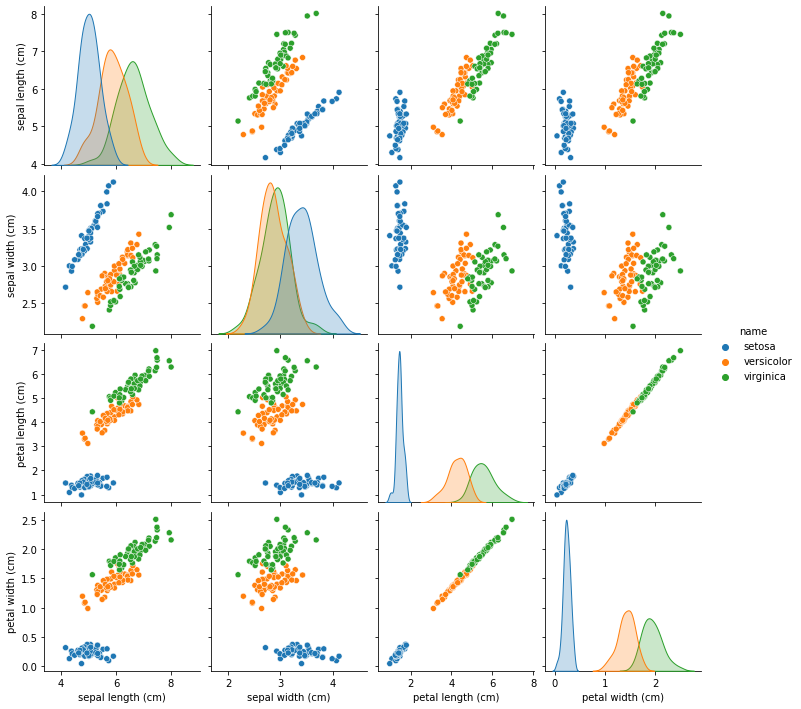

In [ ]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(B)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]], 
    hue = 'name'
)

In [ ]:
B_cov = B.T @ B
print(f'Ковариационная матрица:\n{B_cov}')
U_cov, s_cov, VT_cov = np.linalg.svd(B_cov)
print(f'Собственные значения:\n{s_cov}')
print(f'Собственные векторы:\n{U_cov}')

#Встроенная Функция
B_cov_np = np.cov(B.T)
print(f'Встроенная ковариационная матрица 2:\n{B_cov_np}')
U_cov_np, s_cov_np, VT_cov_np = np.linalg.svd(B_cov_np)
print(f'Собственные значения 2:\n{s_cov_np}')
print(f'Собственные векторы 2:\n{U_cov_np}')

Ковариационная матрица:
[[5220.46398741 2677.85305589 3484.66378717 1130.51314237]
 [2677.85305589 1424.58099772 1673.2796227   528.39397772]
 [3484.66378717 1673.2796227  2581.84701401  870.01352608]
 [1130.51314237  528.39397772  870.01352608  296.86738775]]
Собственные значения:
[9.20830507e+03 3.15454317e+02 3.48933758e-13 1.28520326e-13]
Собственные векторы:
[[-0.75110816 -0.2841749   0.5701633   0.17319055]
 [-0.38008617 -0.5467445  -0.73585155 -0.12299368]
 [-0.51300886  0.70866455 -0.1868695  -0.44687386]
 [-0.16790754  0.34367081 -0.31387274  0.8690117 ]]
Встроенная ковариационная матрица 2:
[[ 0.68222377 -0.0208085   1.28603382  0.52241054]
 [-0.0208085   0.13721124 -0.34521301 -0.15395272]
 [ 1.28603382 -0.34521301  3.10979132  1.2939947 ]
 [ 0.52241054 -0.15395272  1.2939947   0.53951014]]
Собственные значения 2:
[4.22815554e+00 2.40580934e-01 2.10595688e-16 5.71127175e-17]
Собственные векторы 2:
[[-0.36356257 -0.71605943  0.43805296  0.40396876]
 [ 0.08751286 -0.66010344 -

In [ ]:
C = W.dot(B.T).T
C2 = VT_cov.dot(B.T).T
C3 = VT_cov_np.dot(B.T).T
print(f'Матрица признаков C в новом базисе:\n{C}')
print(f'Матрица признаков C2 в новом базисе:\n{C2}')
print(f'Матрица признаков C3 в новом базисе:\n{C3}')

Матрица признаков C в новом базисе:
[[-5.91274714e+00  2.30203322e+00  9.11918500e-16  2.83157236e-16]
 [-5.57248242e+00  1.97182599e+00  1.13542243e-15  1.72620743e-16]
 [-5.44697714e+00  2.09520636e+00  9.65693763e-16  1.20976978e-16]
 [-5.43645948e+00  1.87038151e+00  6.07187635e-16  6.79309450e-17]
 [-5.87564494e+00  2.32829018e+00  1.03732255e-15  1.82506196e-16]
 [-6.47759822e+00  2.32464996e+00  1.09071166e-15  1.17872439e-16]
 [-5.51597520e+00  2.07090423e+00  1.43596574e-15  2.48658532e-16]
 [-5.85092859e+00  2.14807482e+00  3.97083709e-16  1.61439004e-16]
 [-5.15891972e+00  1.77506408e+00  6.23525185e-16  9.74813056e-17]
 [-5.64500117e+00  1.99000106e+00  9.11407037e-16  2.69698162e-16]
 [-6.26539771e+00  2.42576813e+00  8.51378875e-16  1.99435913e-16]
 [-5.75200785e+00  2.02037338e+00  1.02347592e-15  1.66989691e-16]
 [-5.48058085e+00  1.97777558e+00  9.82991364e-16  1.62987470e-16]
 [-4.95112411e+00  2.04828749e+00  8.02732592e-16 -5.37820679e-17]
 [-6.52596417e+00  2.91606

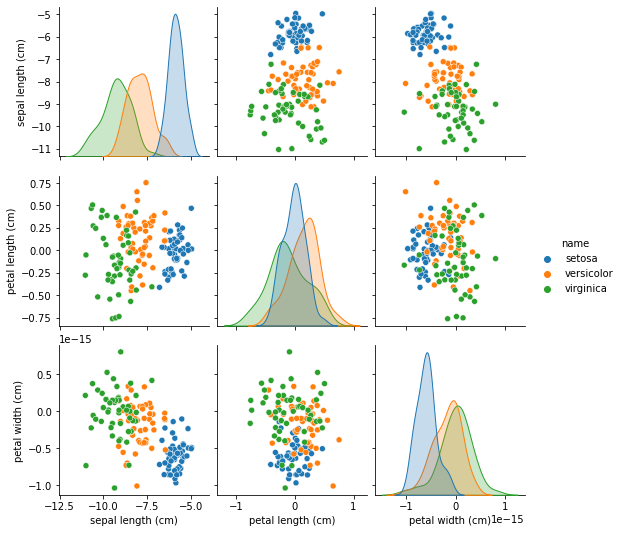

In [ ]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:4].shape
sns.pairplot(iris_frame[['sepal length (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')


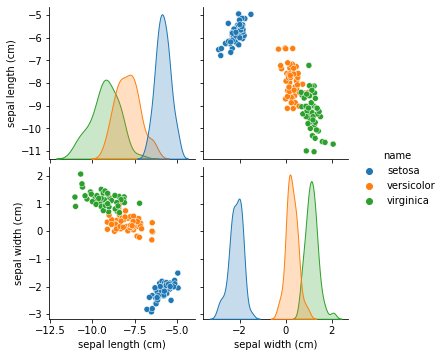

In [ ]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C2)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:3].shape
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','name']], hue = 'name')


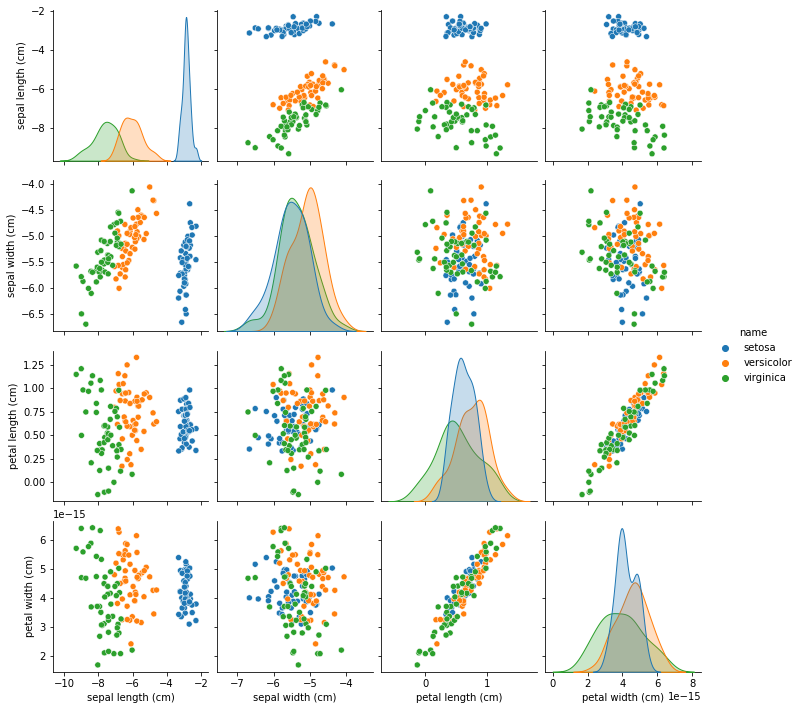

In [ ]:
# Для удобства манипулирования данными делаем из них DataFrame:
iris_frame = DataFrame(C3)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:

samples,features = iris_frame.iloc[:,:5].shape
sns.pairplot(
    iris_frame[[
        'sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)',
        'name'
    ]], 
    hue = 'name'
)